### Obesity - Classification

In [526]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
import matplotlib.cm as cm 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [527]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


* Gender : Male or Female
* Age : Age of the person
* Height : Height in "meter"
* Weight : Weight in "kilogram"
* family_history_with_overweight : if parents/family with obesity
* FAVC : Frequent consumption of high caloric food
* FCVC : Frequency of consumption of vegetables
* NCP : Number of main meals (per day)
* CAEC : Consumption of food between meals
* SMOKE : does the person smoke or not
* CH2O : Consumption of water daily
* SCC : Calories consumption monitoring
* FAF : Physical activity frequency (per week)
* TUE : Time using technology devices
* CALC : Alcool consumption
* MTRANS : what kind of transportation taken
* NObeyesdad : level of obesity

###  Displays the data:

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

We can see that Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS and NObeyesdad are textual attributes.<br> We will handle with them soon.

In [529]:
#Other than 'Age', 'Weight' and 'Height' there is no reason for the other numeric columns to be 'float'. We'll change it.
columns = ["NCP", "CH2O", "TUE", "FAF","FCVC"]
for col in columns:
    df[col] = round(df[col]).astype('int')
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight


In [530]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.345968,0.093305,26.191172,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,3.000000,2.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Our target column is the "NObeyesdad" column, the column has 7 different values of weight definition.<br>
* Insufficient_Weight
* Normal_Weight
* Overweight_Level_I
* Overweight_Level_II
* Obesity_Type_I
* Obesity_Type_II
* Obesity_Type_III

We can see from the graph below that about half of the people in the data are defined as obese (from "Obesity Type 1" and above).

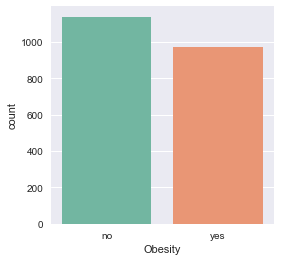

In [531]:
obese = []
for elem in df['NObeyesdad']:
    obese.append('yes') if 'Obesity' in elem else obese.append('no')
df['Obesity'] = obese
plt.figure(figsize=(4,4))
sns.countplot(x=df['Obesity'], data=df,  palette="Set2")
df.drop(columns=['Obesity'],inplace=True)
plt.show()

## Ploting the data:

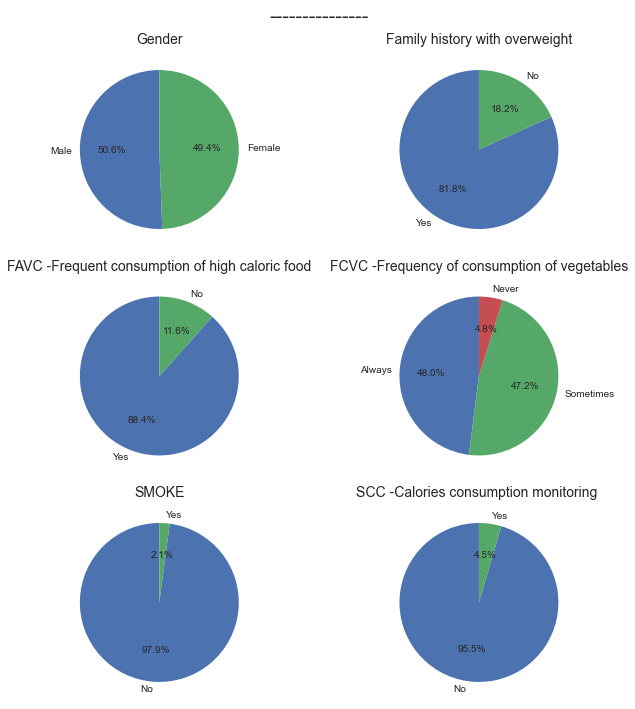

In [532]:
fig, ax = plt.subplots(3,2, figsize = (10,10))
plt.style.use('seaborn')
((ax1, ax2), (ax3, ax4), (ax5, ax6)) = ax
ax1.pie( df['Gender'].value_counts(), labels=['Male','Female'], startangle=90, autopct='%1.1f%%')
ax1.set_title("Gender",fontdict={'fontsize': 14})
ax2.pie( df['family_history_with_overweight'].value_counts(), labels=['Yes','No'], startangle=90, autopct='%1.1f%%')
ax2.set_title("Family history with overweight",fontdict={'fontsize': 14})
ax3.pie( df['FAVC'].value_counts(), labels=['Yes','No'], startangle=90, autopct='%1.1f%%')
ax3.set_title("FAVC -Frequent consumption of high caloric food",fontdict={'fontsize': 14})
ax4.pie( df['FCVC'].value_counts(), labels=['Always','Sometimes','Never'], startangle=90, autopct='%1.1f%%')
ax4.set_title("FCVC -Frequency of consumption of vegetables",fontdict={'fontsize': 14})
ax5.pie( df['SMOKE'].value_counts(), labels=['No','Yes'], startangle=90, autopct='%1.1f%%')
ax5.set_title("SMOKE",fontdict={'fontsize': 14})
ax6.pie( df['SCC'].value_counts(), labels=['No','Yes'], startangle=90, autopct='%1.1f%%')
ax6.set_title("SCC -Calories consumption monitoring ",fontdict={'fontsize': 14})
fig.suptitle("---------------", fontsize=20)
plt.tight_layout()
plt.show()

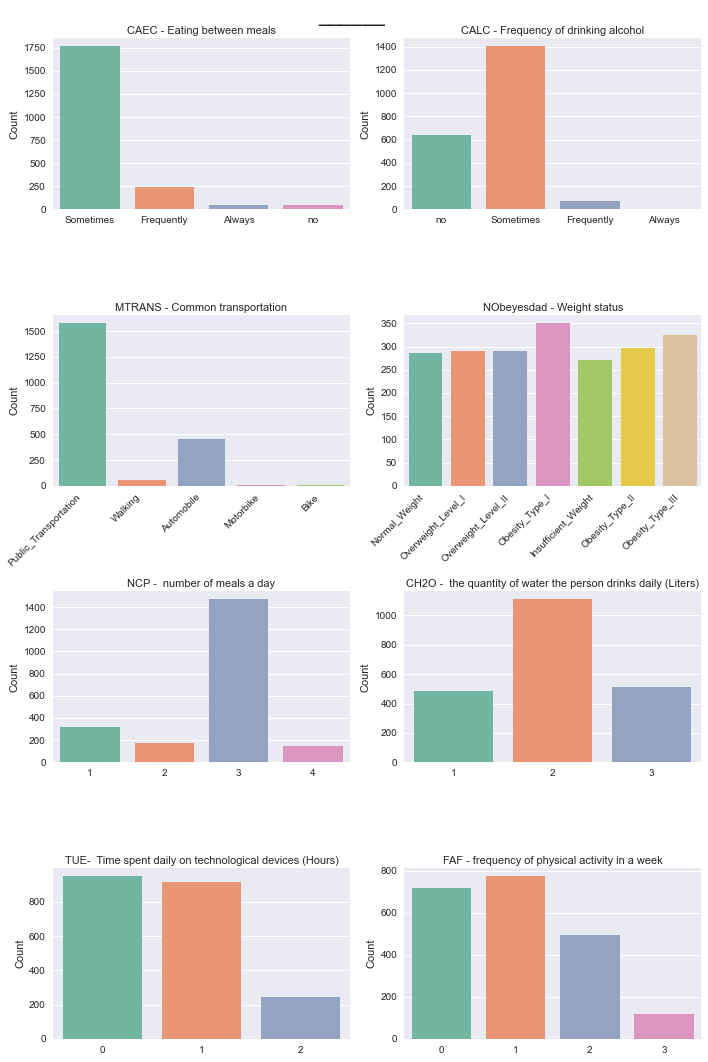

In [533]:
columns = ['CAEC','CALC', 'MTRANS', 'NObeyesdad','NCP', 'CH2O', 'TUE', 'FAF']
labels=['CAEC - Eating between meals','CALC - Frequency of drinking alcohol', 'MTRANS - Common transportation', 'NObeyesdad - Weight status',
       'NCP -  number of meals a day', 'CH2O -  the quantity of water the person drinks daily (Liters)', 'TUE-  Time spent daily on technological devices (Hours)', 'FAF - frequency of physical activity in a week']
count=0
fig, ax = plt.subplots(4,2, figsize=(10, 15))
for col, subplot in zip(columns, ax.flatten()):
    if col=="MTRANS" or col=="NObeyesdad":
        chart = sns.countplot(x= df[col],ax=subplot, palette="Set2")
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=chart.get_xticklabels())  
        subplot.yaxis.label.set_text("Count")
        subplot.xaxis.label.set_text(labels[count])
        subplot.xaxis.set_label_position('top')
    else:
        sns.countplot(x= df[col],ax=subplot, palette="Set2")  
        subplot.yaxis.label.set_text("Count")
        subplot.xaxis.label.set_text(labels[count])
        subplot.xaxis.set_label_position('top')
    count+=1
    
fig.suptitle("______", fontsize=20)
plt.tight_layout()
plt.show()

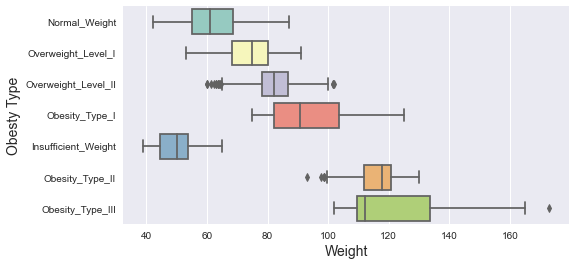

In [535]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Weight", y="NObeyesdad", data=df[["Weight","NObeyesdad"]],palette="Set3")
plt.xlabel("Weight", size=14)
plt.ylabel("Obesty Type", size=14)
plt.show()

From the boxplot we can clearly see that the 'Weight' cloumn and the 'Obesty Type' have high correlation.<br>
Let's check it.   

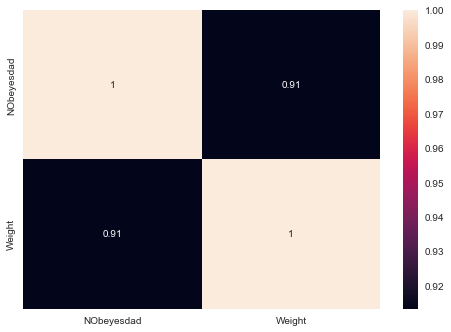

In [536]:
df['NObeyesdad'] = df['NObeyesdad'].map({'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2 ,
                                        'Overweight_Level_II':3, 'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})
sns.heatmap(df[['NObeyesdad','Weight']].corr(), annot=True)
plt.show()

In [537]:
df[["Age","Height"]].groupby(by = df["Gender"]).describe()

Age                                                               \
         count       mean       std   min        25%   50%        75%   max   
Gender                                                                        
Female  1043.0  24.001907  6.407832  15.0  19.627721  22.0  26.000000  61.0   
Male    1068.0  24.616020  6.273121  14.0  20.000000  23.0  27.933529  56.0   

        Height                                                          \
         count      mean       std   min       25%       50%       75%   
Gender                                                                   
Female  1043.0  1.643298  0.074509  1.45  1.596526  1.639524  1.699516   
Male    1068.0  1.758690  0.072174  1.56  1.705205  1.760000  1.807382   

                  
             max  
Gender            
Female  1.843419  
Male    1.980000

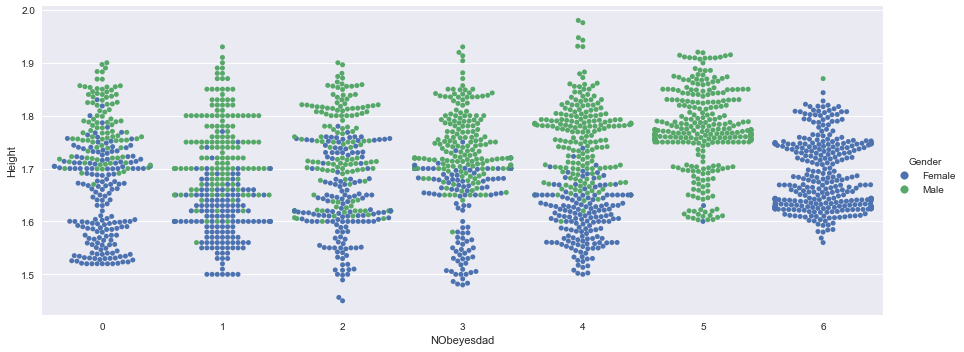

In [538]:
sns.catplot(x="NObeyesdad", y="Height", hue="Gender",kind="swarm", data=df[["NObeyesdad","Height","Gender"]],  height=5, aspect=2.5)
plt.show()

From the graph we can see that in general males are taller than the females in the data.<br>
In addition we can see that in "Obesity Type II" there are mostly males and in "Obesity Type III" there are mostly females.

We need to change the categorial attribute to numeric values.<br>
We will use "get_dummies" to change some of the columns.<br>

In [540]:
df_res = df.copy(deep=True)
df_res = pd.get_dummies(df, columns=['Gender','family_history_with_overweight','FAVC','SMOKE',
                                     'SCC','MTRANS','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC'])
df_res.head(3)

,Age,Height,Weight,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,...,FAF_1,FAF_2,FAF_3,TUE_0,TUE_1,TUE_2,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no
0,21.0,1.62,64.0,1,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,21.0,1.52,56.0,1,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
2,23.0,1.80,77.0,1,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0


We have many features. We would like to check the correlation that each of them has with the "NObeyesdad" column.<br>
Therefore, we will first check the correlations of each column with the "NObeyesdad" column.<br>
Then we will check the correlations of the columns that had a very high or very low correlation.

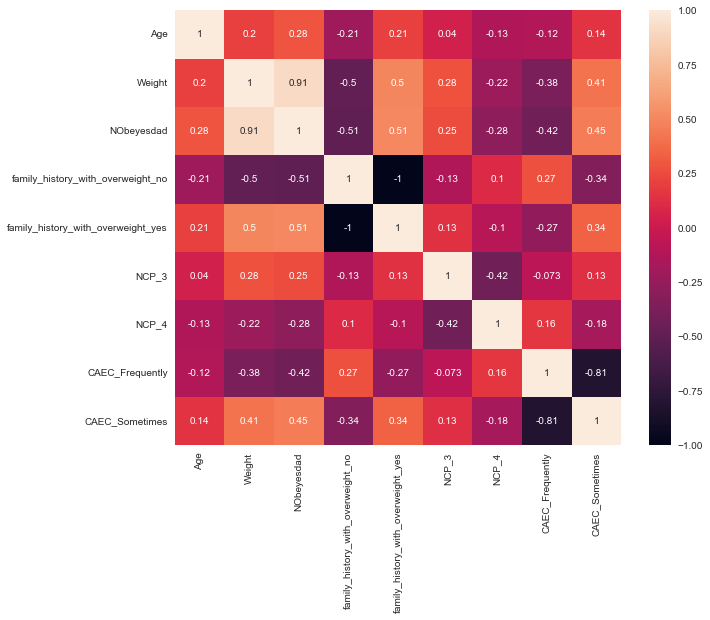

In [545]:
cor_df = df_res.copy(deep=True)
for (index, col) in enumerate(cor_df):
     if (df_res['NObeyesdad'].corr(df_res[col])) <0.25 and (df_res['NObeyesdad'].corr(df_res[col])) >- 0.25:
         cor_df.drop(columns=col,inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor_df.corr(), annot=True)
plt.show()

From the CorrMatrix we can infer that 'Weight' and 'family history with overweight'  have the highest correlation.


In [546]:
df_res['NObeyesdad'] = df_res['NObeyesdad'].map({0:'Insufficient_Weight', 1:'Normal_Weight', 2:'Overweight_Level_I' ,
                                             3:'Overweight_Level_II', 4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})

In [547]:
# Weight is highly correlated and is directly correlate to the BMI calc used for the target
# Remove Weight
df_res = df_res.drop(columns=['Weight'])

In [548]:
# Let's split the data into train and text 
from sklearn.model_selection import train_test_split
X = df_res.drop(columns=["NObeyesdad"])
y = df_res['NObeyesdad'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##  Models:

We will try several models and in the end we will decide which is the best model.<br>
We will try the following models:
* Decision Trees
* Random Forest
* KNN

In [549]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [550]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(X_train_norm, y_train)
dummy_clf.predict(X_train_norm)
print("The DummyClassifier score is:" ,dummy_clf.score(X_test_norm, y_test) )

The DummyClassifier score is: 0.1608832807570978


Precision is defined as the ratio of true positives to the sum of true and false positives. Recall. Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

In [551]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=42)),
          ('Decision Tree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier())
        ]  
    for name, model in models:        
        clf = model.fit(X_train_norm, y_train)
        y_pred = clf.predict(X_test_norm)
        norm_accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        print(name + ':')             
        print("Accuracy:", norm_accuracy)
        print("Classification Report: \n", metrics.classification_report(y_test, y_pred))      
        print("---------------------------------------------------------------\n")      
#run Decision Tree, Random Forest ,KNN
run_models(X_train_norm, y_train, X_test_norm, y_test)

Random Forest:
Accuracy: 0.80442
Classification Report: 
                      precision    recall  f1-score   support

Insufficient_Weight       0.80      0.90      0.85        86
      Normal_Weight       0.62      0.53      0.57        93
     Obesity_Type_I       0.78      0.81      0.80       102
    Obesity_Type_II       0.85      0.95      0.90        88
   Obesity_Type_III       0.97      0.99      0.98        98
 Overweight_Level_I       0.84      0.69      0.76        88
Overweight_Level_II       0.73      0.75      0.74        79

           accuracy                           0.80       634
          macro avg       0.80      0.80      0.80       634
       weighted avg       0.80      0.80      0.80       634

---------------------------------------------------------------

Decision Tree:
Accuracy: 0.72082
Classification Report: 
                      precision    recall  f1-score   support

Insufficient_Weight       0.68      0.76      0.72        86
      Normal_Weight   

After we ran the models, we have reserched on the difference between Random forest and DecisionTree.
DecisionTree is a graph structure which uses branching method and it provides result in every possible way whereas,<br>
random forest combines a decision trees its result depends on all its decision trees.

Since Random Forest had a better score than a Decision tree, we won't try to improve DecisionTree.

# Hyperparameter Tuning

In [472]:
#Searching for better performance out of the models with Gridsearch
from sklearn.model_selection import GridSearchCV

#### KNN

In [19]:
n_neighbors = [int(x) for x in range(4, 15)]
weights = ['uniform','distance']
metric = ['euclidean', 'manhattan', 'chebyshev']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p=[1,2]
parameters = {'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm}
search = GridSearchCV(KNeighborsClassifier(),parameters, verbose=True, n_jobs=15, cv=5,return_train_score=True)
search.fit(X_train_norm,y_train)
y_pred = search.predict(X_test_norm)
print ("Accuracy Score = %3.2f" %(search.score(X_test_norm,y_test)))
print (search.best_params_)
print ("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Accuracy Score = 0.75
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.77      0.85      0.81        86
      Normal_Weight       0.60      0.40      0.48        93
     Obesity_Type_I       0.75      0.75      0.75       102
    Obesity_Type_II       0.74      0.98      0.84        88
   Obesity_Type_III       0.93      0.99      0.96        98
 Overweight_Level_I       0.73      0.62      0.67        88
Overweight_Level_II       0.65      0.65      0.65        79

           accuracy                           0.75       634
          macro avg       0.74      0.75      0.74       634
       weighted avg       0.74      0.75      0.74       634



#### Random Forest


In [20]:
n_estimators = [int(x) for x in range(10, 200,10)]
criterion = ['gini','entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
min_samples_split = [int(x) for x in range(2, 5)]
min_samples_leaf = [int(x) for x in range(2, 5)]
bootstrap = [True, False]
parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
               'max_depth':max_depth,
               'max_features':max_features,
               'min_samples_split':min_samples_split
             }
search = GridSearchCV(RandomForestClassifier(random_state=42), parameters,verbose=True, n_jobs=15, cv=5,return_train_score=True)
search.fit(X_train_norm,y_train)
y_pred = search.predict(X_test_norm)
print ("Accuracy Score = %3.2f" %(search.score(X_test_norm,y_test)))
print (search.best_params_)
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

Fitting 5 folds for each of 3420 candidates, totalling 17100 fits
Accuracy Score = 0.82
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 170}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.80      0.91      0.85        86
      Normal_Weight       0.67      0.59      0.63        93
     Obesity_Type_I       0.79      0.82      0.81       102
    Obesity_Type_II       0.86      0.97      0.91        88
   Obesity_Type_III       0.98      0.99      0.98        98
 Overweight_Level_I       0.82      0.70      0.76        88
Overweight_Level_II       0.77      0.73      0.75        79

           accuracy                           0.82       634
          macro avg       0.81      0.82      0.81       634
       weighted avg       0.82      0.82      0.81       634



In [580]:
model = RandomForestClassifier(criterion = 'gini', random_state=42 ,max_depth =20
                               ,max_features = "auto", min_samples_split= 2,n_estimators = 170)
model.fit(X_train_norm, y_train)
model.predict(X_train_norm)
print("RandomForestClassifier score is:" ,model.score(X_test_norm, y_test))

RandomForestClassifier score is: 0.8170347003154574


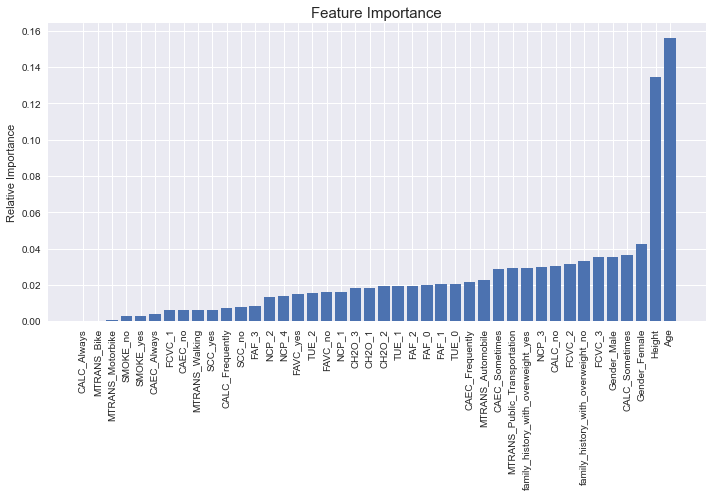

In [579]:
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,7))
plt.title('Feature Importance',fontsize=15)
plt.bar(range(X_train_norm.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_norm.shape[1]), X_train.columns[indices], rotation=90)
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.show()